In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('modified_placement_data.csv')
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
90,4.3,200.0,No
91,4.4,42.0,No
92,6.7,182.0,Yes
93,6.3,103.0,Yes


In [3]:
df=df.dropna()
df['placement'] = df['placement'].replace('Yes', 1)
df['placement'] = df['placement'].replace('No', 0)

C:\Users\sahad\AppData\Local\Temp\ipykernel_6700\3856454228.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['placement'] = df['placement'].replace('No', 0)


In [4]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
90,4.3,200.0,0
91,4.4,42.0,0
92,6.7,182.0,1
93,6.3,103.0,1


In [5]:
import matplotlib.pyplot as plt


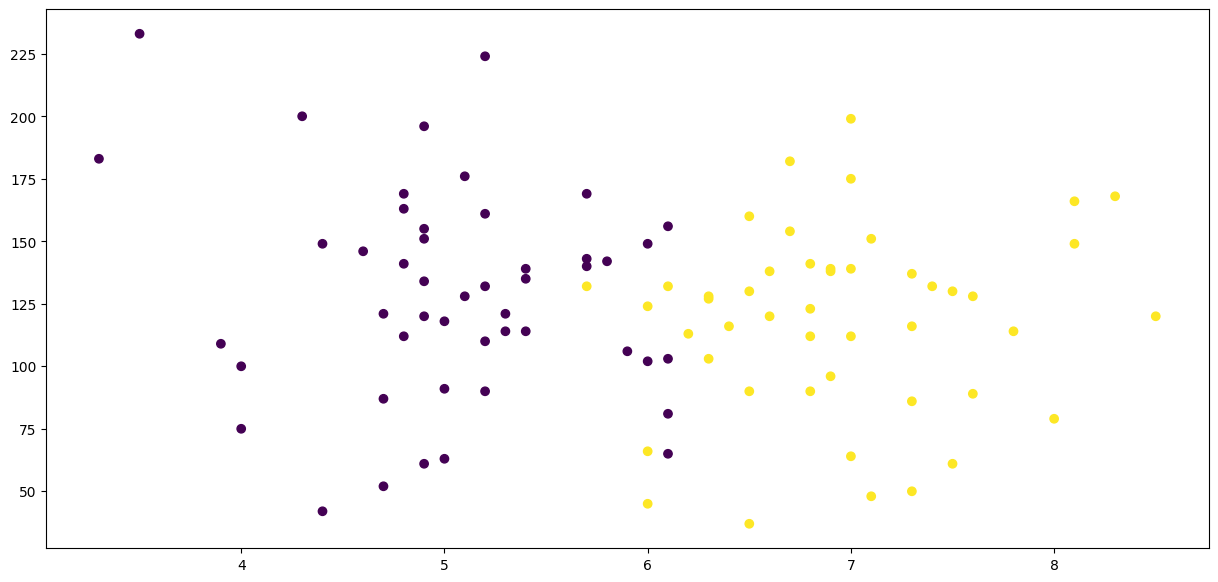

In [6]:
plt.figure(figsize=(15,7))
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [7]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1:]

In [8]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
90,4.3,200.0
91,4.4,42.0
92,6.7,182.0
93,6.3,103.0


In [9]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
90,0
91,0
92,1
93,1


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [11]:
X_train

,cgpa,iq
74,4.9,155.0
50,4.8,141.0
85,4.9,151.0
44,6.0,66.0
47,6.6,138.0
...,...,...
2,5.3,121.0
87,5.2,110.0
18,5.2,132.0
75,7.3,50.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\sahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
predicton=model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,predicton)

In [16]:
score

0.8947368421052632

In [18]:
# from mlxtend.plotting import plot_decision_regions


In [25]:
# plot_decision_regions(X_train, Y_train.values, clf=model, legend=2)

ValueError: y must be a 1D array. Found (76, 1)

In [26]:
import pickle

In [27]:
pickle.dump(model,open('model.pkl','wb'))